In [284]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [285]:
cd D:\IYKRA\File\6. Machine Learning\House Price

D:\IYKRA\File\6. Machine Learning\House Price


In [286]:
# Read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# combine train and test data set
data = pd.concat([train, test],ignore_index=True, sort=False)

In [287]:
print('the shape of  train dataset', train.shape)
print('the shape of  test dataset', test.shape)
print('the shape of data', data.shape)

the shape of  train dataset (1460, 81)
the shape of  test dataset (1459, 80)
the shape of data (2919, 81)


In [288]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [289]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.000,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.000,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [291]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.000,1460.000,842.787,1.000,730.500,1460.000,2189.500,2919.000
MSSubClass,2919.000,57.138,42.518,20.000,20.000,50.000,70.000,190.000
LotFrontage,2433.000,69.306,23.345,21.000,59.000,68.000,80.000,313.000
LotArea,2919.000,10168.114,7886.996,1300.000,7478.000,9453.000,11570.000,215245.000
OverallQual,2919.000,6.089,1.410,1.000,5.000,6.000,7.000,10.000
OverallCond,2919.000,5.565,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,2919.000,1971.313,30.291,1872.000,1953.500,1973.000,2001.000,2010.000
YearRemodAdd,2919.000,1984.264,20.894,1950.000,1965.000,1993.000,2004.000,2010.000
MasVnrArea,2896.000,102.201,179.334,0.000,0.000,0.000,164.000,1600.000
BsmtFinSF1,2918.000,441.423,455.611,0.000,0.000,368.500,733.000,5644.000


In [292]:
#id doesn't affect sale price
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

<h1>Exploratory Data Analysis</h1>

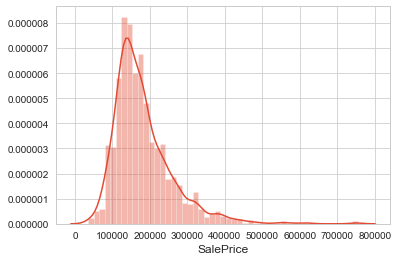

In [293]:
sns.distplot(train['SalePrice'])
plt.show()

In [294]:
print("Skewness in SalePrice :", train['SalePrice'].skew())
print("Kurtosis in SalePrice :", train['SalePrice'].kurt())

Skewness in SalePrice : 1.8828757597682129
Kurtosis in SalePrice : 6.536281860064529


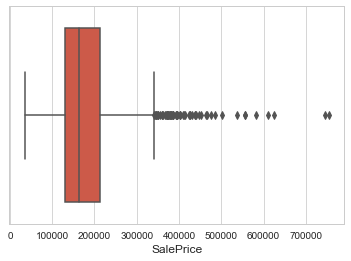

In [295]:
sns.boxplot(train['SalePrice'])
plt.show()

- Target column is right skwed. So log transformation is requried.

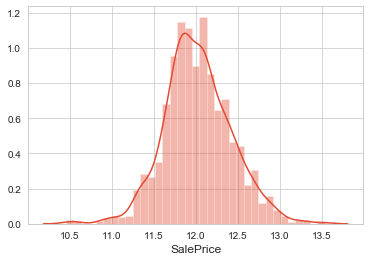

In [296]:
#transform to log
train['SalePrice'] = np.log(train["SalePrice"]+1)
#check distribution after log transform.
sns.distplot(train['SalePrice'])
plt.show()

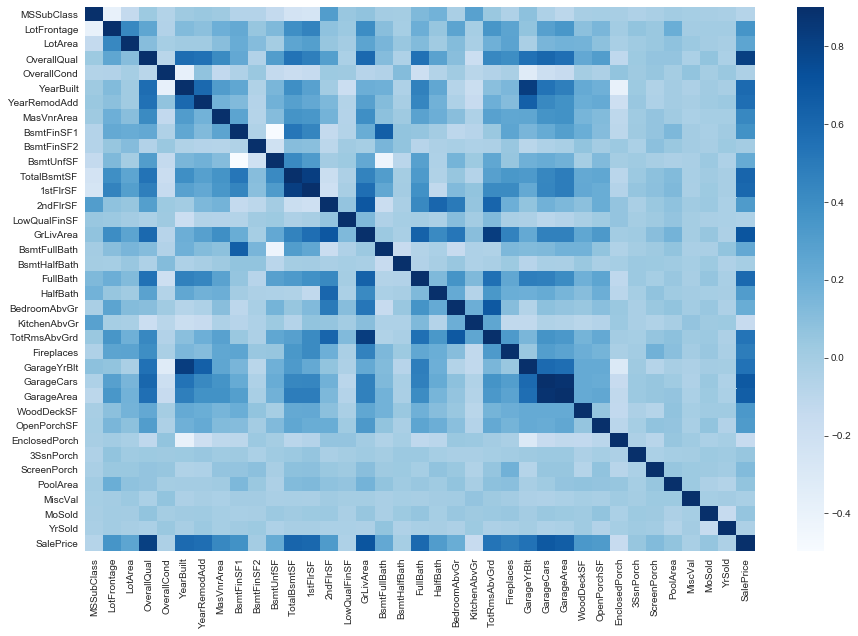

In [297]:
#check correlation
cor = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,cmap="Blues", vmax=0.9)
plt.show()

<h1>Correlation to Sale Price</h1>

In [298]:
cor[abs(cor['SalePrice'].values) >= 0.5]['SalePrice'].sort_values(ascending=False)[1:]

OverallQual    0.817
GrLivArea      0.701
GarageCars     0.681
GarageArea     0.651
TotalBsmtSF    0.612
1stFlrSF       0.597
FullBath       0.595
YearBuilt      0.587
YearRemodAdd   0.566
GarageYrBlt    0.541
TotRmsAbvGrd   0.534
Name: SalePrice, dtype: float64

<h1> so check this their now realtion </h1>

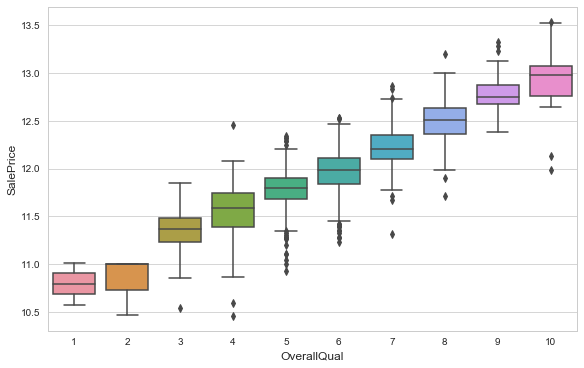

In [299]:
# OverallQual is catagorical feature so draw boxplot
fig = plt.figure(constrained_layout=True, figsize=(8,5))
sns.boxplot(train['OverallQual'], train['SalePrice'])
plt.show()

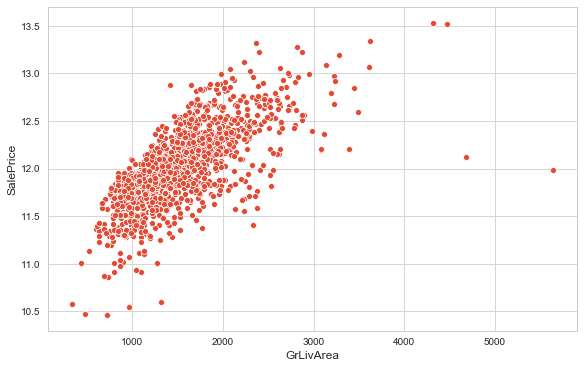

In [300]:
fig = plt.figure(constrained_layout=True, figsize=(8,5))
sns.scatterplot(train['GrLivArea'], train['SalePrice'])
plt.show()

<h1>Cleaning Outliers</h1>

In [301]:
#Delete the outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<12.5)].index)

train.reset_index(drop = True, inplace = True)

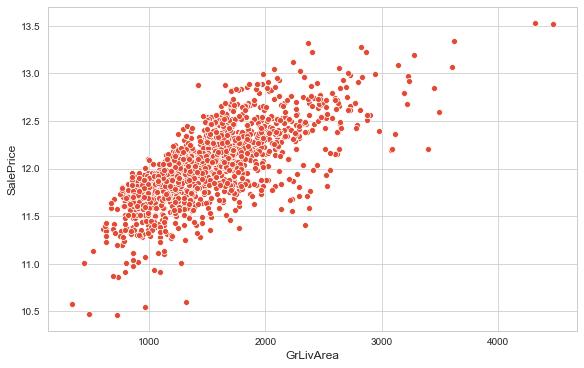

In [302]:
# scatter plot after removing outliers.
fig = plt.figure(constrained_layout=True, figsize=(8,5))
sns.scatterplot(train['GrLivArea'], train['SalePrice'])
plt.show()

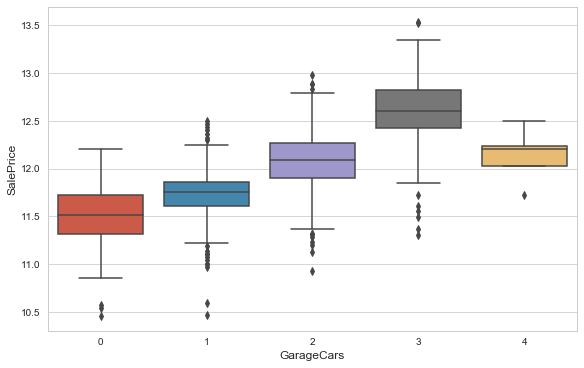

In [303]:
fig = plt.figure(constrained_layout=True, figsize=(8,5))
sns.boxplot(train['GarageCars'], train['SalePrice'])
plt.show()

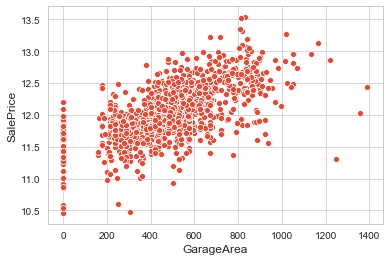

In [304]:
sns.scatterplot(train['GarageArea'], train['SalePrice'])
plt.show()

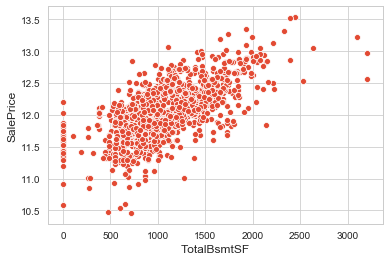

In [305]:
sns.scatterplot(train['TotalBsmtSF'], train['SalePrice'])
plt.show()

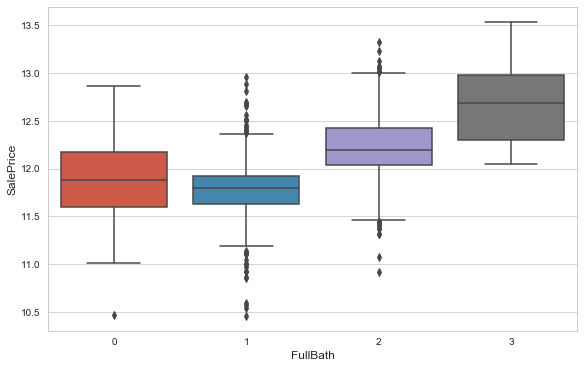

In [306]:
fig = plt.figure(constrained_layout=True, figsize=(8,5))
sns.boxplot(train['FullBath'], train['SalePrice'])
plt.show()

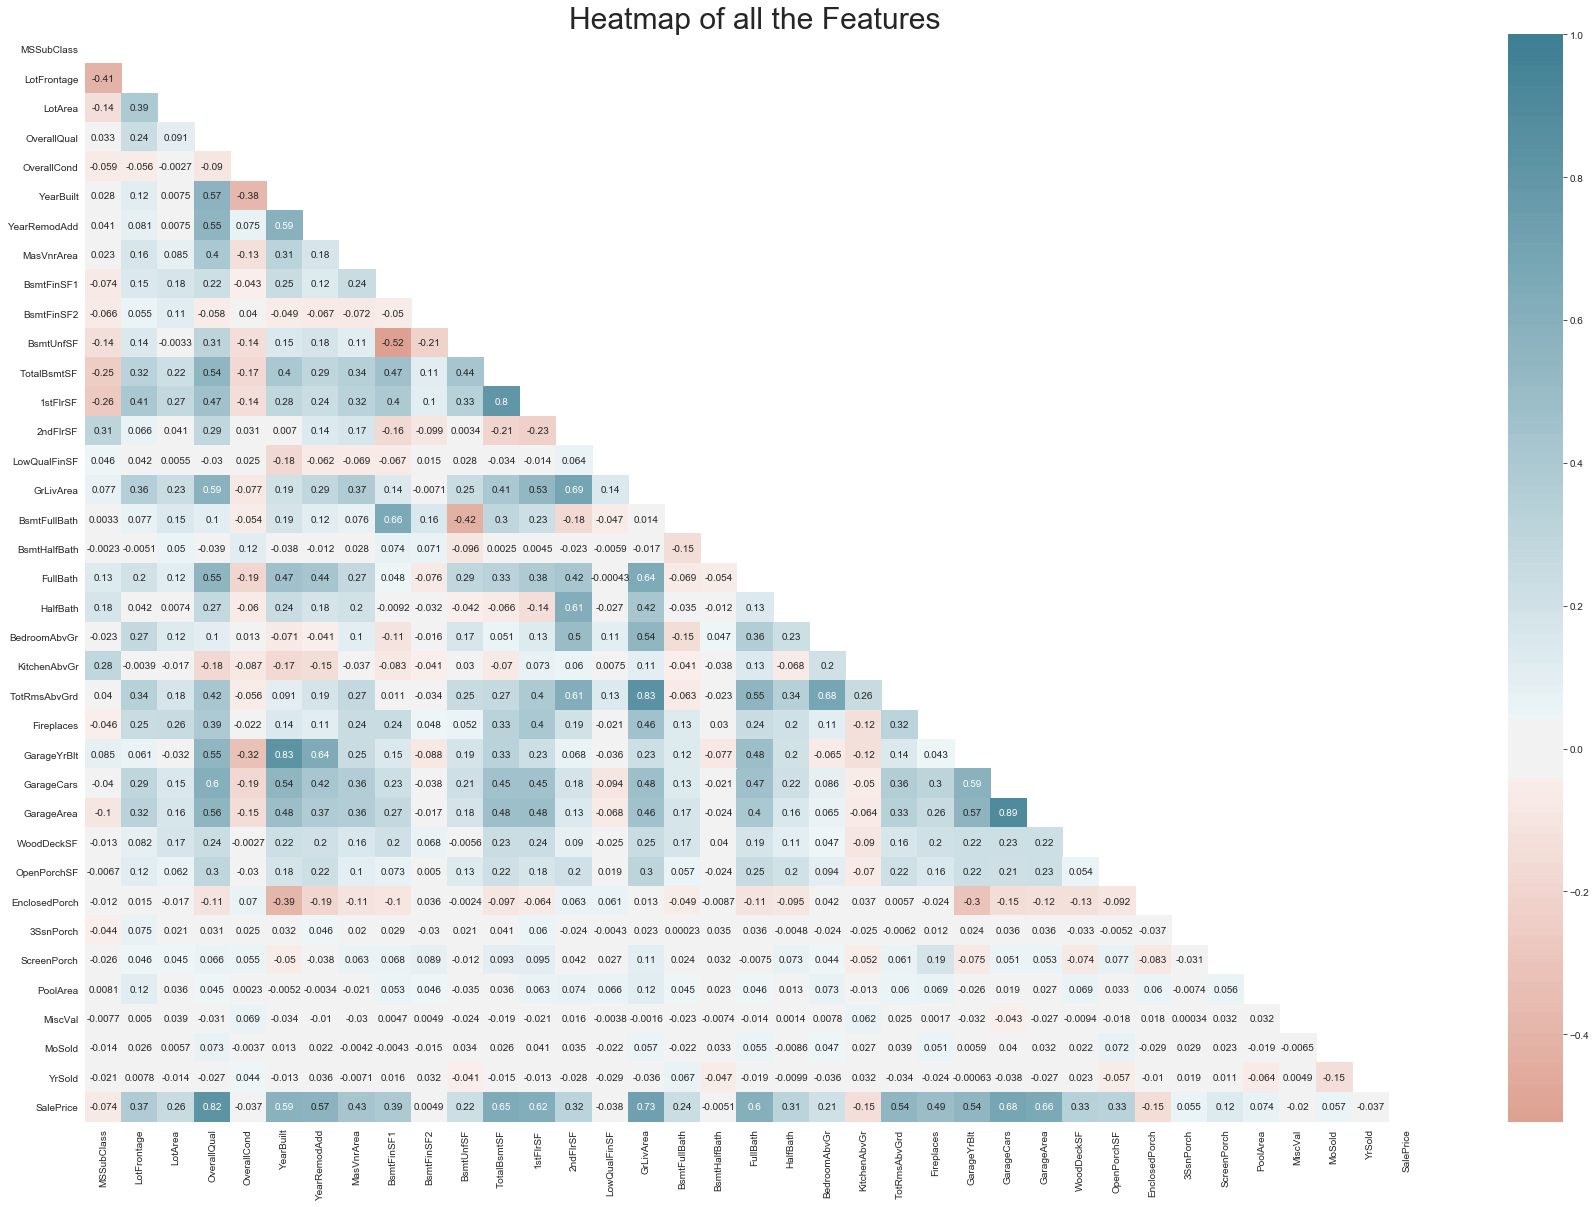

In [307]:
## Plot fig sizing. 
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train.corr(), cmap=sns.diverging_palette(20, 220, n=200), mask = mask, annot=True, center = 0, );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

In [308]:
# again concat train and test cause we have done changes in train dataset. 
data = pd.concat((train, test)).reset_index(drop=True)

In [309]:
columns = data.columns

for col in columns:
    print(data[col].value_counts())
    print('\n')

20     1079
60      573
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64


RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64


60.000     276
80.000     137
70.000     133
50.000     117
75.000     105
          ... 
182.000      1
119.000      1
195.000      1
153.000      1
141.000      1
Name: LotFrontage, Length: 128, dtype: int64


9600     44
7200     43
6000     34
9000     29
10800    25
         ..
2628      1
8775      1
13478     1
13587     1
12292     1
Name: LotArea, Length: 1949, dtype: int64


Pave    2905
Grvl      12
Name: Street, dtype: int64


Grvl    120
Pave     78
Name: Alley, dtype: int64


Reg    1859
IR1     967
IR2      76
IR3      15
Name: LotShape, dtype: int64


Lvl    2622
HLS     120
Bnk     115
Low      60
Name: LandContour, dtype: int64


AllPub  

Name: PavedDrive, dtype: int64


0      1523
100      74
192      70
144      61
168      56
       ... 
95        1
97        1
99        1
274       1
857       1
Name: WoodDeckSF, Length: 379, dtype: int64


0      1298
36       52
48       51
40       44
32       38
       ... 
372       1
368       1
364       1
324       1
282       1
Name: OpenPorchSF, Length: 250, dtype: int64


0      2458
112      22
96       13
144      11
192      10
       ... 
334       1
330       1
324       1
318       1
238       1
Name: EnclosedPorch, Length: 183, dtype: int64


0      2880
153       3
168       3
144       2
180       2
216       2
219       1
176       1
86        1
96        1
120       1
130       1
140       1
255       1
150       1
162       1
245       1
174       1
225       1
23        1
182       1
196       1
323       1
224       1
238       1
290       1
304       1
320       1
360       1
508       1
407       1
Name: 3SsnPorch, dtype: int64


0      2661
144      13
1

<h1>Check missing values</h1>

In [310]:
missing_tot = data.isnull().sum().sort_values(ascending = False)
missing_per = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([missing_tot, missing_per] , axis=1, keys=['Total', 'Percent'])

In [311]:
missing_data.head(40)

,Total,Percent
PoolQC,2908,99.691
MiscFeature,2812,96.400
Alley,2719,93.212
Fence,2346,80.425
SalePrice,1459,50.017
FireplaceQu,1420,48.680
LotFrontage,486,16.661
GarageCond,159,5.451
GarageYrBlt,159,5.451
GarageQual,159,5.451


<h1>Separate Object & Numerical Val</h1>

In [312]:
#separate the numerical value
data_cat = data.select_dtypes('object')
data_int =  data.select_dtypes(['int64','float64'])

In [313]:
data_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [314]:
data_cat.isnull().sum().sort_values(ascending =False)

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
Electrical          1
KitchenQual         1
SaleType            1
Exterior2nd         1
Exterior1st         1
Heating             0
Condition1          0
Street              0
PavedDrive          0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
RoofStyle           0
Condition2          0
BldgType            0
HouseStyle          0
HeatingQC           0
RoofMatl            0
ExterQual           0
ExterCond           0
Foundation          0
CentralAir          0
SaleCondition       0
dtype: int64

In [315]:
d = data_cat.isnull().sum().sort_values(ascending =False)
d.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MSZoning',
       'Functional', 'Utilities', 'Electrical', 'KitchenQual', 'SaleType',
       'Exterior2nd', 'Exterior1st', 'Heating', 'Condition1', 'Street',
       'PavedDrive', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'RoofStyle', 'Condition2', 'BldgType', 'HouseStyle',
       'HeatingQC', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation',
       'CentralAir', 'SaleCondition'],
      dtype='object')

- To decide about null values I have done old type analysis by using paper and pen
- For example, Like in 'PoolQc' column 2908 null values, but in as per data description
  PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
- Means null values are reprsenting No pool so fill them by 'None'
- One more example, if 'GarageType' is null and as per data description

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
- Means null values neans no Garage so  fill them by 'None'
- And the features related to Garage like 'GarageYrBlt', 'GarageFinish', 'GarageCars','GarageArea','GarageQual','GarageCond' will follow same lead.
- Like in ('GarageCars':  Size of garage in car capacity) if there is now Garage means 'GarageCars' null represnts '0'.
- As we can see 'GarageCars' column in above  value count code. 
      2.0    1593
      1.0     776
      3.0     373
      0.0     157
      4.0      16
      5.0       1
 
- Use data desciption for fill null values


<h1>Replace Few NA Data to None, as they represent "not exist" rather than null</h1>

In [316]:
# fill null values by none cause this null represpents they are not avaliable on site so fill by 'None'
columns1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond',
       'GarageQual', 'GarageFinish', 'GarageType', 'BsmtCond', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']

# fill by mode
columns2 = ['MSZoning','Functional', 'Utilities', 'Electrical', 'KitchenQual', 'SaleType',
       'Exterior2nd', 'Exterior1st']

In [317]:
for col in columns1:
    data_cat[col].fillna('None',inplace =True)

<h1>Change the missing value to mode value</h1>

In [318]:
for col  in columns2:
    data_cat[col].fillna(data[col].mode()[0],inplace = True)

In [319]:
d2 = data_int.isnull().sum().sort_values(ascending=False)
d2.index

Index(['SalePrice', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
       'BsmtFullBath', 'BsmtFinSF1', 'GarageCars', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'OverallCond',
       'GrLivArea', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'LotArea', 'FullBath', 'YrSold', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'MSSubClass'],
      dtype='object')

<h1>Numerical Data to 0</h1>

In [320]:
columns3 = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath',
       'BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', 'GarageCars',
       'BsmtFinSF2', 'BsmtFinSF1']

In [321]:
for col in columns3:
    data_int[col].fillna(0,inplace=True)

In [322]:
df = pd.concat([data_cat,data_int],axis=1)

In [323]:
# Since these column are actually a category , using a numerical number will lead the model to assume
# that it is numerical , so we convert to string .
df['MSSubClass'] = df['MSSubClass'].apply(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.drop('SalePrice', axis=1, inplace = True)

- Double Check missing value

In [324]:
missing_tot = df.isnull().sum().sort_values(ascending = False)
missing_per = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([missing_tot, missing_per] , axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
YrSold,0,0.000
CentralAir,0,0.000
BsmtQual,0,0.000
BsmtCond,0,0.000
BsmtExposure,0,0.000


<h1>Check the skewness</h1>

In [325]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_feats

MiscVal         21.951
PoolArea        17.698
LotArea         13.116
LowQualFinSF    12.091
3SsnPorch       11.378
KitchenAbvGr     4.303
BsmtFinSF2       4.147
EnclosedPorch    4.004
ScreenPorch      3.947
BsmtHalfBath     3.932
MasVnrArea       2.623
OpenPorchSF      2.531
WoodDeckSF       1.846
1stFlrSF         1.258
GrLivArea        1.069
BsmtFinSF1       0.981
BsmtUnfSF        0.920
2ndFlrSF         0.862
TotRmsAbvGrd     0.750
Fireplaces       0.726
HalfBath         0.697
TotalBsmtSF      0.672
BsmtFullBath     0.623
OverallCond      0.570
BedroomAbvGr     0.327
GarageArea       0.217
OverallQual      0.190
FullBath         0.166
LotFrontage     -0.128
GarageCars      -0.219
YearRemodAdd    -0.450
YearBuilt       -0.600
GarageYrBlt     -3.907
dtype: float64

- normalize high skew value

In [326]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skewed_feats[skewed_feats > 0.5]
skew_index = high_skew.index

# Normalise skewed features
for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))
    

In [327]:
final_features = pd.get_dummies(df).reset_index(drop=True)
print('Features size:', df.shape)
final_features.head()

Features size: (2917, 79)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish

In [328]:
final_features.shape

(2917, 331)

<h1> Modeling </h1>

In [329]:
#split the data
nrow_train = train.shape[0]

X_train = final_features[:nrow_train]
X_test = final_features[nrow_train:]
Y = train['SalePrice']

In [330]:
display(X_train.shape)
display(X_test.shape)
display(Y.shape)

(1458, 331)

(1459, 331)

(1458,)

In [331]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

# Kernel Ridge Regression : made robust to outliers
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

# LASSO Regression : made robust to outliers
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                    alphas=alphas2,random_state=42, cv=kfolds))

# Elastic Net Regression : made robust to outliers
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, 
                         alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))



In [332]:
#Fit the training data X_train,Y 
print('Elasticnet')
elastic_model = elasticnet.fit(X_train, Y)
print('Lasso')
lasso_model = lasso.fit(X_train, Y)
print('Ridge')
ridge_model = ridge.fit(X_train, Y)

Elasticnet
Lasso
Ridge


In [333]:
#blend the model and use fitted models to make predictions
def blend_models(X):
    return ((elastic_model.predict(X)) + (lasso_model.predict(X)) + (ridge_model.predict(X)))/3

In [334]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.expm1(blend_models(X_test))

In [335]:
# Fix outleir predictions
q1 = submission['SalePrice'].quantile(0.0045)
q2 = submission['SalePrice'].quantile(0.99)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission_regression1.csv", index=False)

In [336]:
submission

,Id,SalePrice
0,1461,121174.725
1,1462,157094.678
2,1463,184472.123
3,1464,202365.266
4,1465,194931.862
...,...,...
1454,2915,88396.552
1455,2916,82218.428
1456,2917,169598.033
1457,2918,117515.116


In [337]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import linear_model

#Random Forest
regr = RandomForestRegressor(max_depth=3)
model_rf=regr.fit(X_train,Y)

#Support Vector Machine (SVM)
clf = SVR(kernel='poly')
model_svm=clf.fit(X_train, Y)
model_svm

#Linear Regression
lr=linear_model.LinearRegression(normalize=False)
model_lr=lr.fit(X_train,Y)
model_lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [338]:
pred_en=elastic_model.predict(X_train)
pred_l=lasso_model.predict(X_train)
pred_r=ridge_model.predict(X_train)
pred_lr=model_lr.predict(X_train)
pred_svm=model_svm.predict(X_train)
pred_rf=model_rf.predict(X_train)

In [339]:
#from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [340]:
print('ElasticNet Evaluation Matrix')
print('########################')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y, pred_en),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(Y, pred_en),5))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y,pred_en)),5))
print('R-Squared:', round(np.sqrt(metrics.r2_score(Y,pred_en)),5))

ElasticNet Evaluation Matrix
########################
Mean Absolute Error: 0.06706
Mean Squared Error: 0.00944
Root Mean Squared Error: 0.09714
R-Squared: 0.97


In [341]:
print('Lasso Regression Evaluation Matrix')
print('########################')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y, pred_l),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(Y, pred_l),5))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y,pred_l)),5))
print('R-Squared:', round(np.sqrt(metrics.r2_score(Y,pred_l)),5))

Lasso Regression Evaluation Matrix
########################
Mean Absolute Error: 0.0671
Mean Squared Error: 0.00945
Root Mean Squared Error: 0.09721
R-Squared: 0.96996


In [342]:
print('Ridge Regression Evaluation Matrix')
print('########################')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y, pred_r),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(Y, pred_r),5))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y,pred_r)),5))
print('R-Squared:', round(np.sqrt(metrics.r2_score(Y,pred_r)),5))

Ridge Regression Evaluation Matrix
########################
Mean Absolute Error: 0.06476
Mean Squared Error: 0.00887
Root Mean Squared Error: 0.09416
R-Squared: 0.97184


In [343]:
print('Linear Regression Evaluation Matrix')
print('########################')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y, pred_lr),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(Y, pred_lr),5))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y,pred_lr)),5))
print('R-Squared:', round(np.sqrt(metrics.r2_score(Y,pred_lr)),5))

Linear Regression Evaluation Matrix
########################
Mean Absolute Error: 0.06049
Mean Squared Error: 0.00759
Root Mean Squared Error: 0.08715
R-Squared: 0.97593


In [344]:
print('Linear Regression Evaluation Matrix')
print('########################')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y, pred_svm),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(Y, pred_svm),5))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y,pred_svm)),5))
print('R-Squared:', round(np.sqrt(metrics.r2_score(Y,pred_svm)),5))

Linear Regression Evaluation Matrix
########################
Mean Absolute Error: 0.12605
Mean Squared Error: 0.03315
Root Mean Squared Error: 0.18206
R-Squared: 0.89017


In [345]:
print('Random Forest Evaluation Matrix')
print('########################')
print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y, pred_rf),5))
print('Mean Squared Error:', round(metrics.mean_squared_error(Y, pred_rf),5))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y,pred_rf)),5))
print('R-Squared:', round(np.sqrt(metrics.r2_score(Y,pred_rf)),5))

Random Forest Evaluation Matrix
########################
Mean Absolute Error: 0.13495
Mean Squared Error: 0.0341
Root Mean Squared Error: 0.18467
R-Squared: 0.88679


In [346]:
def blend_models2(X):
    return ((elastic_model.predict(X)) + (lasso_model.predict(X)) + (ridge_model.predict(X)) + (model_rf.predict(X)) + (model_svm.predict(X)) + (model_lr.predict(X)))/6

In [347]:
submission2 = pd.read_csv("sample_submission.csv")
submission2.iloc[:,1] = np.expm1(blend_models2(X_test))

In [348]:
# Fix outleir predictions
q1 = submission2['SalePrice'].quantile(0.0045)
q2 = submission2['SalePrice'].quantile(0.99)
submission2['SalePrice'] = submission2['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission2['SalePrice'] = submission2['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission2.to_csv("submission_regression2.csv", index=False)

In [349]:
submission2

,Id,SalePrice
0,1461,126452.856
1,1462,154678.923
2,1463,183969.866
3,1464,195833.678
4,1465,196432.578
...,...,...
1454,2915,92070.128
1455,2916,91132.052
1456,2917,167351.806
1457,2918,117356.217
